# Preprocessing

This notebook shows the preprocessing and transforms of CenterSpeedDataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import sys

current_dir = os.path.dirname(os.path.abspath(''))
one_up_dir = os.path.dirname(current_dir)
sys.path.append(one_up_dir)

from dataset.CenterSpeed_dataset import *



In [7]:
transform = transforms.Compose([
    RandomRotation(45, 256, 6),
    RandomFlip(0.5)
])
set = CenterSpeedDataset('../data/CenterSpeedDataset', transform=transform)
set.change_image_size(256)
set.change_pixel_size(0.02)


Reading the following files:  ../data/CenterSpeedDataset/25_04_Dataset02_FTG_10s.csv
Number of entries:  349
Reading the following files:  ../data/CenterSpeedDataset/25_04_Dataset01_FTG_10s.csv
Number of entries:  341
Reading the following files:  ../data/CenterSpeedDataset/16_05_Dataset04.csv
Number of entries:  386
Reading the following files:  ../data/CenterSpeedDataset/16_05_Dataset06_manual2.csv
Number of entries:  398
Reading the following files:  ../data/CenterSpeedDataset/06_04_Dataset04.csv
Number of entries:  1278
Reading the following files:  ../data/CenterSpeedDataset/06_04_Dataset03.csv
Number of entries:  1278
Reading the following files:  ../data/CenterSpeedDataset/25_04_Dataset04_10s.csv
Number of entries:  350
Reading the following files:  ../data/CenterSpeedDataset/25_04_Dataset03_10s.csv
Number of entries:  350
Reading the following files:  ../data/CenterSpeedDataset/06_04_Dataset03_Front.csv
Number of entries:  1278
Reading the following files:  ../data/CenterSpeedD

Length of Dataset 15347
Printing Index:  13479
torch.Size([6, 256, 256])
Data:  tensor([ 0.7558,  1.0149,  0.3715, -1.8991,  1.3776])


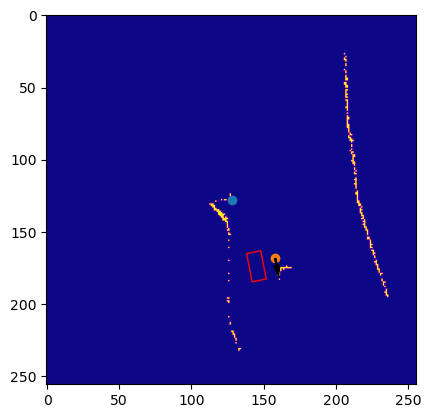

Printing Index:  13815
torch.Size([6, 256, 256])
Data:  tensor([ 1.1723,  0.4763,  1.9315,  0.1180, -0.0610])


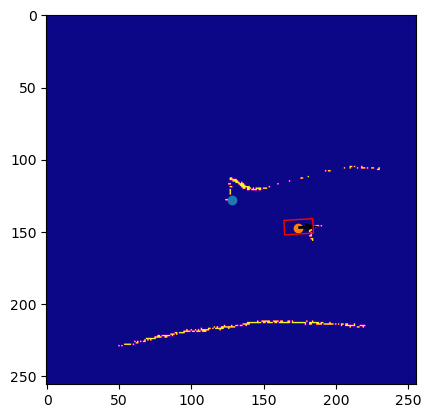

Printing Index:  13675
torch.Size([6, 256, 256])
Data:  tensor([ 0.8939,  0.8956,  0.6409, -1.8260,  1.2333])


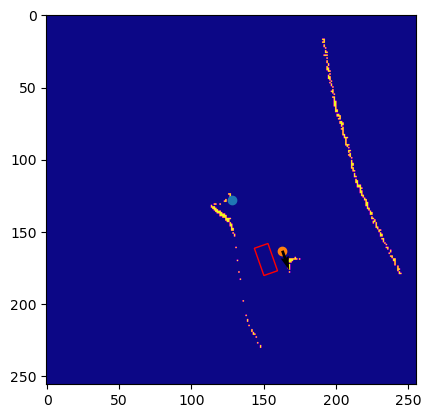

Printing Index:  13236
torch.Size([6, 256, 256])
Data:  tensor([ 1.2173, -0.3456,  1.4504,  1.2811, -0.7235])


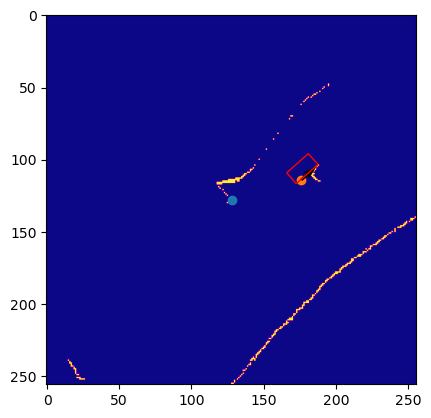

Printing Index:  4317
torch.Size([6, 256, 256])
Data:  tensor([ 1.0720,  0.6723,  1.0341, -1.6357,  1.0070])


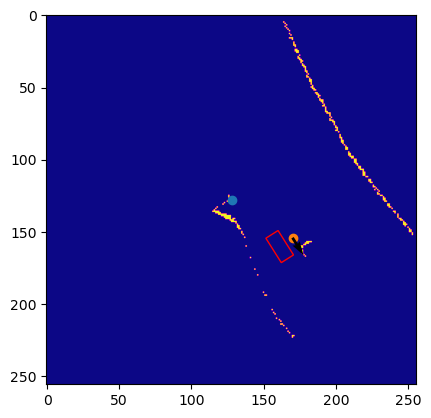

Length of Dataset 15347
Input Shape torch.Size([6, 256, 256])
GT Shape torch.Size([256, 256])
Data Shape torch.Size([5])
Data tensor(1.0720)


In [8]:
def cartesian_to_pixel(x, y, image_size=[256,256], pixel_size=0.025):
    pixel_x = int(x / pixel_size + image_size[0] / 2)
    pixel_y = int(y / pixel_size + image_size[1] / 2)
    return pixel_x, pixel_y

print("Length of Dataset",len(set))

for i in range(5):
    ind = random.randint(0,len(set))
    index = ind
    input, gt, data,_ = set[2144]
    print("Printing Index: ", ind)
    print(input.shape)
    print("Data: ", data)
    plt.imshow(input[0], cmap='plasma')
    plt.scatter(128,128)
    x,y = cartesian_to_pixel(data[0],data[1])
    plt.scatter(x,y)
    #plt.scatter(x2,y2)
    plt.quiver(x,y ,data[2],data[3])
    yaw_degrees = np.rad2deg(data[4])
    rectangle = patches.Rectangle((x-10, y-5), 20, 10, angle=yaw_degrees, fill=False, color='r')

    # Add the rectangle to the plot
    plt.gca().add_patch(rectangle)

    plt.scatter
    plt.show()
    
#plt.imshow(input[0])
#plt.scatter(128,128)
#plt.show()
#plt.imshow(gt)
#plt.show() 
#plt.imshow((input[0]+gt).clip(0,1))  
print("Length of Dataset",len(set))
print("Input Shape",input.shape)
print("GT Shape",gt.shape)
print("Data Shape",data.shape)
print("Data",data[0])
